In [1]:
from molrep import model_zoo
print(model_zoo)

Architectures                  Types
cmpnn                          graph_learning
diffpool                       graph_learning
dmpnn                          graph_learning
gat                            graph_learning
gin                            graph_learning
graphnet                       graph_learning
graphsage                      graph_learning
mpnn                           graph_learning
graphformer                    graph_learning
attr_masking                   pretraining
edge_pred                      pretraining
context_pred                   pretraining


In [2]:
from molrep import load_model_and_preprocess, load_explainer, expalin_and_visualize

In [3]:
model, preprocess = load_model_and_preprocess('gin', 'ogbg-molbbbp', device='cuda')

Missing keys []
load checkpoint from /data/user/raojh/worksapce/MolRep-v2/model_checkpoints/gin_ogbg-molbbbp_best.pth


In [4]:
mols, data = preprocess.process([
    'C(=O)(OC(C)(C)C)CCCc1ccc(cc1)N(CCCl)CCCl',
    'C1CCN(CC1)Cc1cccc(c1)OCCCNC(=O)C',
    'FC1=CNC(=O)NC1=O',
    'OCC(C)(O)c1onc(c2ncn3c2CN(C)C(c4c3cccc4Cl)=O)n1',
    'CN1CCN(CCCN2c3ccccc3Sc4ccc(cc24)C(F)(F)F)CC1',
])

In [5]:
model.predict(data, task='classification')

array([[0.9376302 ],
       [0.9132353 ],
       [0.91906893],
       [0.92174065],
       [0.93079257]], dtype=float32)

In [6]:
explainer = load_explainer('cam')

In [7]:
svgs = expalin_and_visualize(explainer, model, data)

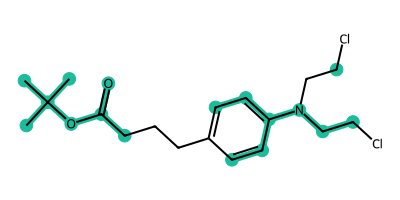

In [8]:
from IPython.display import SVG
SVG(svgs[0])